# Visualizing the Data
This notebook contains the code to generate the three primary figures analyzing the wildfire, smoke, and AQI estimates, described in detail below.

## Importing Libraries

In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Loading the Data

In [2]:
aqi_cleaned = pd.read_csv('../data_clean/norman_aqi_yearly_average.csv')
smoke_cleaned = pd.read_csv('../data_clean/norman_wildfires_SI_yearly_average.csv')

with open("../data_intermediate/norman_wildfires_SI.json", "r") as file:
    wildfires_650 =  json.load(file)

with open("../data_intermediate/norman_wildfires_SI_1800.json", "r") as file:
    wildfires_1800 =  json.load(file)

## 1.) Fire Range Histogram
This code chunk creates a histogram showing the number of fires occurring every 50 mile distance from Norman, OK for all fires ranging up to 1800 miles away, and displays the 650 mile cutoff mark used in the rest of the analyses.


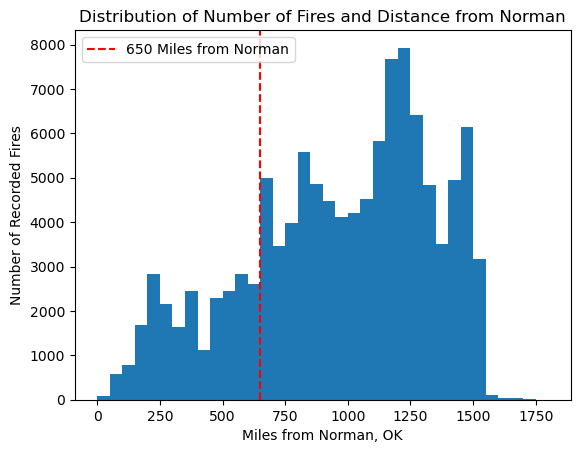

In [11]:
#Extract the distances and plot them as a histogram
distances_list = []
for fire in wildfires_1800:
    distances_list.append(fire['distance_from_norman'])

plt.hist(distances_list, bins= range(0, 1850, 50))
plt.axvline(x=650, color='red', linestyle='--', linewidth=1.5, label='650 Miles from Norman')
plt.title("Distribution of Number of Fires and Distance from Norman")
plt.ylabel("Number of Recorded Fires")
plt.xlabel("Miles from Norman, OK")
plt.legend()
plt.show()


## 2.) Total Acres Burned
This code chunk creates a time series graph of total acres burned per year for the fires occuring within 650 miles from Norman, OK

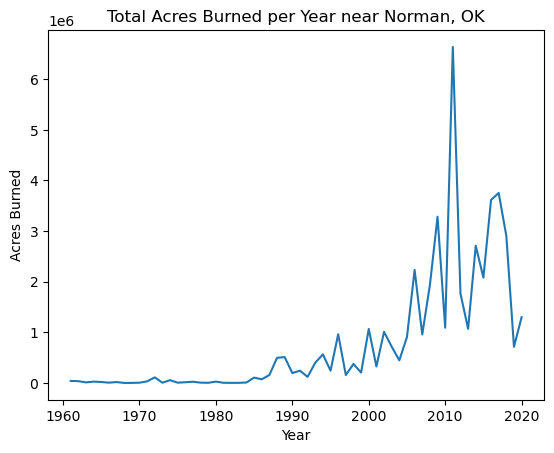

In [30]:
# Initialize empty dictionary
yearly_acres_burned = {}

# Compute total acres burned for all of the fires, 
for index, fire in enumerate(wildfires_650):
    if fire['Fire_Year'] in yearly_acres_burned:
        yearly_acres_burned[fire['Fire_Year']] += fire['GIS_Acres']
    else:
        yearly_acres_burned[fire['Fire_Year']] = fire['GIS_Acres']

#Exploratory plotting of the smoke estimate
yearly_acres_burned_df = pd.DataFrame.from_dict(yearly_acres_burned, orient='index', columns=['Total_Acres_Burned']).reset_index().rename(columns={'index':'Year'})
#yearly_smoke_estimate_df = yearly_smoke_estimate_df[yearly_smoke_estimate_df['Year'] > 2012]
plt.plot(yearly_acres_burned_df['Year'], yearly_acres_burned_df['Total_Acres_Burned'])
plt.title("Total Acres Burned per Year near Norman, OK")
plt.xlabel("Year")
plt.ylabel("Acres Burned")
plt.show()

## 3.) Smoke and AQI Estimates
This code chunk creates a time series graph containing the fire smoke and AQI estimates for Norman, OK

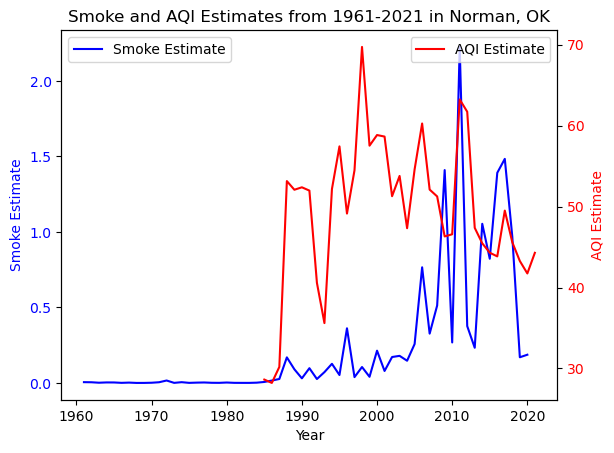

In [29]:
# Define subplots so we can plot on top of each other
fig, ax_si = plt.subplots()

#Plot the smoke estimate
ax_si.plot(smoke_cleaned['Year'], smoke_cleaned['Smoke_Estimate'], color='blue', label='Smoke Estimate')
ax_si.set_xlabel("Year")
ax_si.set_ylabel("Smoke Estimate", color='blue')
ax_si.tick_params(axis="y", labelcolor="blue")
ax_si.legend()

# Plot the AQI estimate
ax_aqi = ax_si.twinx()
ax_aqi.plot(aqi_cleaned['Year'], aqi_cleaned['Average_AQI_Estimate'], color='red', label='AQI Estimate')
ax_aqi.set_ylabel("AQI Estimate", color='red')
ax_aqi.tick_params(axis="y", labelcolor="red")
ax_aqi.legend()

plt.title("Smoke and AQI Estimates from 1961-2021 in Norman, OK")
plt.show()